concat한 데이터를 불러와서 rfm에 맞는 분석 진행하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
import pickle
with open("C:/Users/passion/jupyter/열정에 시동/result.pickle","rb") as fr:
    result=pickle.load(fr)

In [3]:
result

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,DE_DT,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,17,15000,110,1,2021-01-01,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,13,79700,110,1,2021-01-01,1369,1,13,2021-01-01,1,1,4,10,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,0,50,16,51800,160,2,2021-01-25,6000,1,0,2021-01-25,1,25,0,11,NULL,NULL,NULL,1
353180,M470112503,0,50,16,6440,160,2,2021-01-04,6000,1,0,2021-01-04,1,4,0,21,NULL,NULL,NULL,1
353181,M748878049,0,30,10,17600,120,1,2021-01-19,6000,1,0,2021-01-19,1,19,1,20,NULL,NULL,NULL,1
353182,M748878049,0,30,10,12400,120,1,2021-01-19,6000,1,0,2021-01-19,1,19,1,18,NULL,NULL,NULL,1


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983176 entries, 0 to 353183
Data columns (total 20 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   CUST          object
 1   MA_FEM_DV     int32 
 2   AGES          int64 
 3   C_ZON_HLV     int32 
 4   BUY_AM        int64 
 5   COP_C         int32 
 6   CHNL_DV       int64 
 7   DE_DT         object
 8   PD_C          int32 
 9   BUY_CT        int64 
 10  S_ZON_HLV     int32 
 11  DE_DT         object
 12  MONTH         int64 
 13  DATE          int64 
 14  DAY           int64 
 15  DE_HR         int64 
 16  CLAC_HLV_NM   object
 17  CLAC_MCLS_NM  object
 18  PD_NM         object
 19  LPAY_USE      int64 
dtypes: int32(5), int64(9), object(6)
memory usage: 703.3+ MB


In [5]:
result.columns

Index(['CUST', 'MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'BUY_AM', 'COP_C', 'CHNL_DV',
       'DE_DT', 'PD_C', 'BUY_CT', 'S_ZON_HLV', 'DE_DT', 'MONTH', 'DATE', 'DAY',
       'DE_HR', 'CLAC_HLV_NM', 'CLAC_MCLS_NM', 'PD_NM', 'LPAY_USE'],
      dtype='object')

# 본격적인 rfm 시작하기

일단 기본적으로 cust를 기준으로 groupby를 하겠다<br>
여기서 month, buy_ct, buy_am으로 묶겠다

In [6]:
rfm = result.groupby("CUST").agg(
    Recency_R=pd.NamedAgg(column="MONTH", aggfunc="max"),
    Frequency_F=pd.NamedAgg(column="BUY_CT", aggfunc="sum"),
    Monetary_M =pd.NamedAgg(column="BUY_AM", aggfunc="sum" ),
    LPAY_USE =pd.NamedAgg(column="LPAY_USE", aggfunc="mean" )
)
rfm = rfm.reset_index()
rfm

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
0,M000034966,12,64,658020,0.000000
1,M000059535,3,1,46000,0.000000
2,M000136117,12,133,28748531,0.031250
3,M000201112,11,30,53120,0.000000
4,M000225114,12,192,2253900,0.000000
...,...,...,...,...,...
29869,M999708287,9,2,60000,0.000000
29870,M999770689,12,479,2087570,0.193154
29871,M999849895,12,120,1118792,0.000000
29872,M999926092,12,7,129500,0.000000


그럼 각각 R F M의 분포를 찍어보고 기준을 정하자

## Recency_R 대한 기준 찾기

value_count로 봤을때 12월이 가장 많이 있기때문에 12월로 기준을 두었다

In [7]:
print('Recency_R')
print(rfm['Recency_R'].value_counts(),'\n')

Recency_R
12    20951
11     3047
10     1652
9       962
8       831
7       550
6       496
5       416
4       313
3       264
2       198
1       194
Name: Recency_R, dtype: int64 



## Frequency_F에 대한 기준 찾기

그래프모양이 기하급수적으로 떠어지고 있음으로 평균을 사용하는것이 아니라 3사분위의 값을 기준을 잡았다.<br>
그러니 기준이 되는 값을 279로 잡는다<br>
lpay_use와 기준이 똑같다.

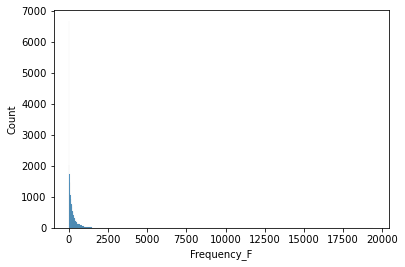

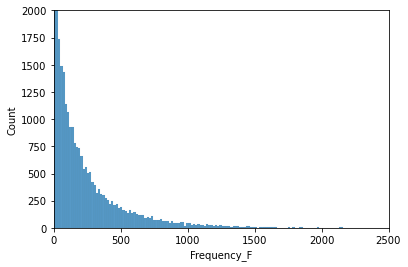

In [8]:
sns.histplot(rfm['Frequency_F'])
plt.show()
sns.histplot(rfm['Frequency_F'])
plt.ylim([0, 2000])
plt.xlim([0, 2500])
plt.show()

In [9]:
rfm['Frequency_F'].describe()

count    29874.000000
mean       212.328279
std        320.362158
min          1.000000
25%         23.000000
50%        106.000000
75%        279.000000
max      19426.000000
Name: Frequency_F, dtype: float64

## Monetary_M 대한 기준 찾기

10% 절사평균 사용<br>
상위 5%와 하위5%를 제거한 뒤 구매 금액을 나누는 기준을 정했다<br>
평균과 3사분위수의 사이인 300만원을 기준으로 정함

In [10]:
rfm['Monetary_M'].describe()

count    2.987400e+04
mean     4.290784e+06
std      1.361154e+07
min      1.000000e+01
25%      3.581112e+05
50%      1.437050e+06
75%      3.803288e+06
max      7.119147e+08
Name: Monetary_M, dtype: float64

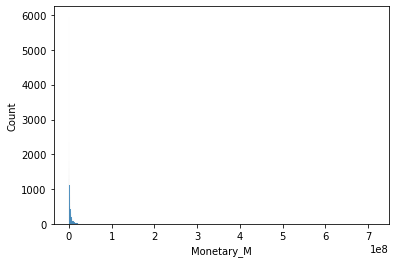

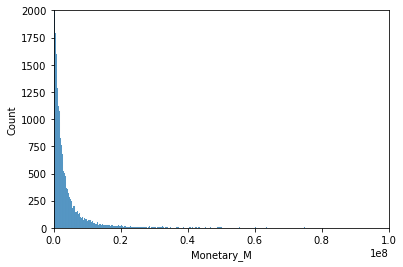

In [11]:
sns.histplot(rfm['Monetary_M'])
plt.show()
sns.histplot(rfm['Monetary_M'])
plt.ylim([0, 2000]) 
plt.xlim([0, 100000000])
plt.show()

In [12]:
print(rfm['Monetary_M'].quantile(q=0.05, interpolation='nearest'))
print(rfm['Monetary_M'].quantile(q=0.95, interpolation='nearest'))

24600
15372370


In [13]:
data = rfm[(rfm['Monetary_M']>24600) & (rfm['Monetary_M']<15372370)]
data['Monetary_M'].describe()

count    2.688300e+04
mean     2.540388e+06
std      2.999871e+06
min      2.470000e+04
25%      4.339560e+05
50%      1.437050e+06
75%      3.426504e+06
max      1.536988e+07
Name: Monetary_M, dtype: float64

In [14]:
data

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
0,M000034966,12,64,658020,0.000000
1,M000059535,3,1,46000,0.000000
3,M000201112,11,30,53120,0.000000
4,M000225114,12,192,2253900,0.000000
5,M000261625,12,72,6075950,0.000000
...,...,...,...,...,...
29868,M999673157,12,28,2851370,0.000000
29869,M999708287,9,2,60000,0.000000
29870,M999770689,12,479,2087570,0.193154
29871,M999849895,12,120,1118792,0.000000


In [15]:
data = rfm[(rfm['Monetary_M']>3000000)]
data

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
2,M000136117,12,133,28748531,0.031250
5,M000261625,12,72,6075950,0.000000
6,M000350564,12,34,9630400,0.000000
7,M000419293,12,131,5653101,0.344262
8,M000494848,12,654,30430065,0.186508
...,...,...,...,...,...
29857,M999227380,12,71,4796170,0.028169
29860,M999340261,3,7,3468000,0.000000
29866,M999515910,12,782,7450295,0.000000
29867,M999599111,11,122,5661659,0.681416


## lpay_use에 대한 기준 찾기

0, 1, 2점으로 나누기<br>
0점 = (구매 기록 중)엘페이 아예 안 쓰는 사람 <br>
1점 = (구매 기록 중)엘페이 조금 쓰는 사람 <br>
2점 = (구매 기록 중)엘페이 많이 쓰는 사람 <br>
0점인 사람을 다 빼고 엘페이를 사용했던 사람들을 기준으로 describe해서 기준 잡기 <br>
3사분위수 사용 <br>
(이유: 엘페이 사용자를 반반으로 나누면 나머지 반이 엘페이를 많이 사용한다고 말할 수 없기 때문 <br>
& 시각화 해보았을 때 엘버우 포인트가 3사분위수인 0.24가 적당하다고 판단했다)

In [16]:
rfm['LPAY_USE'].describe()

count    29874.000000
mean         0.052332
std          0.132043
min          0.000000
25%          0.000000
50%          0.000000
75%          0.024242
max          1.000000
Name: LPAY_USE, dtype: float64

In [17]:
data = rfm[(rfm['LPAY_USE']>0)]
data

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
2,M000136117,12,133,28748531,0.031250
7,M000419293,12,131,5653101,0.344262
8,M000494848,12,654,30430065,0.186508
12,M000557840,12,392,3761418,0.103542
20,M000871427,12,131,2322180,0.041322
...,...,...,...,...,...
29857,M999227380,12,71,4796170,0.028169
29859,M999268192,12,56,1827060,0.535714
29867,M999599111,11,122,5661659,0.681416
29870,M999770689,12,479,2087570,0.193154


In [18]:
data['LPAY_USE'].describe()

count    8906.000000
mean        0.175541
std         0.191986
min         0.000398
25%         0.039370
50%         0.111111
75%         0.249120
max         1.000000
Name: LPAY_USE, dtype: float64

<AxesSubplot:xlabel='LPAY_USE', ylabel='Count'>

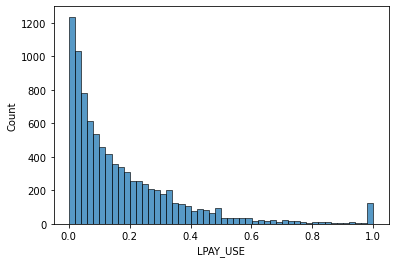

In [19]:
sns.histplot(data['LPAY_USE'])

## 결론

그럼 기준은 정해졌는데 <br>
Recency_R    >>  12면 1 나머지는 0        <br>
Frequency_F  >>  279보다 크면 1 작으면 0  <br>
Monetary_M   >>  3000000보다 크면 1 작으면 0  
lpay_use     >>  엘페이를 안쓰는 사람 = 0 , 엘페이를 비율이 0.24보다 작은 사람 = 1 , 0.24보다 큰 사람 = 2

In [20]:
rfm['Recency_R'] = np.where(rfm['Recency_R']==12, 1, 0)
rfm['Frequency_F'] = np.where(rfm['Frequency_F']>=212, 1, 0)
rfm['Monetary_M'] = np.where(rfm['Monetary_M']>=3000000, 1, 0)
rfm['LPAY_USE'] = np.where(rfm['LPAY_USE']== 0 , 0 ,np.where(rfm['LPAY_USE']>=0.24, 2,1))
RFML = rfm

In [21]:
import pickle
with open("RFML.pickle","wb") as fw:
    pickle.dump(RFML, fw)